# Overarching Task:

## Flight Booking Cuve
   - Just Flight Level
    - Cabin Lvel [Business vs Economy]
    - Booking Class Level (Price Fluctuations)
    
## Flight Booking Class Fare
- Fare Avg - just group all flight and do
- Cabin Fare Avg - group by cabin and do
- Booking Fare Avg - do the whole dataset

In [135]:
import pandas as pd

In [136]:
s = '/Users/aniruddhamukherjee/Downloads/Fin-A-Lytics | Dataset Modified/12month_flight_booking_code_OVERALL_csv.csv'

df = pd.read_csv(s)

In [138]:
rename_space = {' Origin': 'Origin' , ' Destination':'Destination', ' Booking Class Fare USD ': 'Booking Class Fare USD'}
df.rename(columns=rename_space, inplace=True)
df

In [139]:
df = df.drop(['Cabin','Booking Class', 'Unnamed: 0'], axis=1)
df

,Origin,Destination,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,B: 365,B: 364,B: 363,...,B: 9,B: 8,B: 7,B: 6,B: 5,B: 4,B: 3,B: 2,B: 1,B: 0
0,BBB,DDD,200.01,AA,304,10/04/22,05:55,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10
1,BBB,DDD,463.65,AA,304,10/04/22,05:55,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,6.0,7.0,7.0,7.0,7.0,7
2,BBB,DDD,149.83,AA,304,10/04/22,05:55,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,BBB,DDD,127.29,AA,304,10/04/22,05:55,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
4,BBB,DDD,90.92,AA,304,10/04/22,05:55,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195769,YYY,CCC,262.00,AA,65,20/09/23,17:45,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195770,YYY,CCC,301.27,AA,65,20/09/23,17:45,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195771,YYY,CCC,386.14,AA,65,20/09/23,17:45,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195772,YYY,CCC,809.18,AA,65,20/09/23,17:45,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5


# Aggregating the cols Vertically as Multiple Rows Indicate 1 flight.
## The code below, makes 1 row for 1 flight, summing up "Booking Class Fare USD"

In [140]:
# Redefine the columns to sum vertically, as they were lost due to the previous errors
columns_to_sum = ['Booking Class Fare USD']
l = [f'B: {i}' for i in range(366)]
columns_to_sum += l

# Identify the correct names for the columns in the primary key, based on the current DataFrame columns
correct_primary_key_columns = [col for col in df.columns if col.strip() in ['Origin', 'Destination', 'Flight number', 'Dep_Date', 'Dep_time']]

# Group the data by the corrected primary key and sum the specified columns
grouped_df = df.groupby(correct_primary_key_columns)[columns_to_sum].sum().reset_index()
grouped_df

,Origin,Destination,Flight number,Dep_Date,Dep_time,Booking Class Fare USD,B: 0,B: 1,B: 2,B: 3,...,B: 356,B: 357,B: 358,B: 359,B: 360,B: 361,B: 362,B: 363,B: 364,B: 365
0,AAA,BBB,1385,01/02/23,06:10,8358.56,77,78.0,78.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,BBB,1385,01/03/23,06:10,8358.56,87,87.0,88.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,BBB,1385,01/04/23,06:10,8358.56,85,84.0,82.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,BBB,1385,01/05/23,06:10,8355.57,91,92.0,88.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA,BBB,1385,01/06/23,06:10,8355.57,90,88.0,86.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,ZZZ,YYY,572,30/08/23,23:55,14427.86,93,86.0,86.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9631,ZZZ,YYY,572,31/05/23,23:55,14283.45,110,109.0,109.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9632,ZZZ,YYY,572,31/07/23,23:55,14427.86,48,44.0,45.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9633,ZZZ,YYY,572,31/08/23,23:55,14427.86,49,49.0,48.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
grouped_df.Dep_Date = pd.to_datetime(df.Dep_Date,format='%d/%m/%y')
df['Dep_time'] = df['Dep_time'].str.strip()
grouped_df['Dep_time'] = pd.to_datetime(df['Dep_time'], format='%H:%M').dt.time
B_rows_list = [f'B: {i}' for i in range(366)]

In [163]:
small_group = grouped_df
small_group = small_group.copy()
small_group

,Origin,Destination,Flight number,Dep_Date,Dep_time,Booking Class Fare USD,B: 0,B: 1,B: 2,B: 3,...,B: 356,B: 357,B: 358,B: 359,B: 360,B: 361,B: 362,B: 363,B: 364,B: 365
0,AAA,BBB,1385,2022-04-10,05:55:00,8358.56,77,78.0,78.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,BBB,1385,2022-04-10,05:55:00,8358.56,87,87.0,88.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,BBB,1385,2022-04-10,05:55:00,8358.56,85,84.0,82.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,BBB,1385,2022-04-10,05:55:00,8355.57,91,92.0,88.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAA,BBB,1385,2022-04-10,05:55:00,8355.57,90,88.0,86.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,ZZZ,YYY,572,2023-07-13,06:55:00,14427.86,93,86.0,86.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9631,ZZZ,YYY,572,2023-07-13,06:55:00,14283.45,110,109.0,109.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9632,ZZZ,YYY,572,2023-07-13,06:55:00,14427.86,48,44.0,45.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9633,ZZZ,YYY,572,2023-07-13,06:55:00,14427.86,49,49.0,48.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
new_df = pd.get_dummies(small_group, columns=['Origin', 'Destination']) 
new_df.dtypes

Flight number                      int64
Dep_Date                  datetime64[ns]
Dep_time                          object
Booking Class Fare USD           float64
B: 0                               int64
                               ...      
Destination_AAA                     bool
Destination_BBB                     bool
Destination_CCC                     bool
Destination_DDD                     bool
Destination_YYY                     bool
Length: 380, dtype: object

In [165]:
new_df['dayofweek'] = new_df.Dep_Date.apply(lambda x: x.dayofweek)
week_day = new_df['dayofweek']
new_df['quarter'] = new_df.Dep_Date.apply(lambda x: x.quarter)

new_df['dayofmonth'] = new_df.Dep_Date.apply(lambda x: x.day)
new_df['month'] = new_df.Dep_Date.apply(lambda x: x.month)
new_df['year'] = new_df.Dep_Date.apply(lambda x: x.year)

new_df['dayofyear'] = new_df.Dep_Date.apply(lambda x: x.dayofyear)

In [166]:
new_df['hour'] = new_df.Dep_time.apply(lambda x: x.hour)
new_df['minute'] = new_df.Dep_time.apply(lambda x: x.minute)

In [167]:
# Convert Dep_Date to datetime object if it isn't already
new_df['Dep_Date'] = pd.to_datetime(new_df['Dep_Date'])


month = new_df['month']
# One-hot encode 'dayofweek' and 'quarter'
dayofweek_dummies = pd.get_dummies(new_df['dayofweek'], prefix='dayofweek')
quarter_dummies = pd.get_dummies(new_df['quarter'], prefix='quarter')
month_dummies = pd.get_dummies(new_df['month'], prefix='month')
# month_dummies = pd.get_dummies(new_df['month'], prefix='month')

# Concatenate the original DataFrame with the one-hot encoded columns
new_df = pd.concat([new_df, dayofweek_dummies, quarter_dummies,month_dummies], axis=1)

# Drop the original 'dayofweek' and 'quarter' columns as they are now one-hot encoded
new_df.drop(['dayofweek', 'quarter','month'], axis=1, inplace=True)

In [168]:
new_df

,Flight number,Dep_Date,Dep_time,Booking Class Fare USD,B: 0,B: 1,B: 2,B: 3,B: 4,B: 5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1385,2022-04-10,05:55:00,8358.56,77,78.0,78.0,83.0,82.0,82.0,...,False,True,False,False,False,False,False,False,False,False
1,1385,2022-04-10,05:55:00,8358.56,87,87.0,88.0,88.0,91.0,89.0,...,False,True,False,False,False,False,False,False,False,False
2,1385,2022-04-10,05:55:00,8358.56,85,84.0,82.0,82.0,82.0,85.0,...,False,True,False,False,False,False,False,False,False,False
3,1385,2022-04-10,05:55:00,8355.57,91,92.0,88.0,88.0,88.0,87.0,...,False,True,False,False,False,False,False,False,False,False
4,1385,2022-04-10,05:55:00,8355.57,90,88.0,86.0,85.0,85.0,85.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,572,2023-07-13,06:55:00,14427.86,93,86.0,86.0,81.0,81.0,80.0,...,False,False,False,False,True,False,False,False,False,False
9631,572,2023-07-13,06:55:00,14283.45,110,109.0,109.0,107.0,104.0,103.0,...,False,False,False,False,True,False,False,False,False,False
9632,572,2023-07-13,06:55:00,14427.86,48,44.0,45.0,43.0,41.0,39.0,...,False,False,False,False,True,False,False,False,False,False
9633,572,2023-07-13,06:55:00,14427.86,49,49.0,48.0,46.0,47.0,47.0,...,False,False,False,False,True,False,False,False,False,False


In [169]:
new_df = new_df.drop('Dep_Date', axis=1)
new_df = new_df.drop('Dep_time', axis=1)
new_df.dtypes

Flight number               int64
Booking Class Fare USD    float64
B: 0                        int64
B: 1                      float64
B: 2                      float64
                           ...   
month_8                      bool
month_9                      bool
month_10                     bool
month_11                     bool
month_12                     bool
Length: 406, dtype: object

In [170]:
print(new_df.dtypes.unique())
new_df = new_df.drop(['Flight number'], axis=1)
new_df

[dtype('int64') dtype('float64') dtype('bool')]


,Flight number,Booking Class Fare USD,B: 0,B: 1,B: 2,B: 3,B: 4,B: 5,B: 6,B: 7,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1385,8358.56,77,78.0,78.0,83.0,82.0,82.0,81.0,82.0,...,False,True,False,False,False,False,False,False,False,False
1,1385,8358.56,87,87.0,88.0,88.0,91.0,89.0,87.0,85.0,...,False,True,False,False,False,False,False,False,False,False
2,1385,8358.56,85,84.0,82.0,82.0,82.0,85.0,86.0,86.0,...,False,True,False,False,False,False,False,False,False,False
3,1385,8355.57,91,92.0,88.0,88.0,88.0,87.0,86.0,86.0,...,False,True,False,False,False,False,False,False,False,False
4,1385,8355.57,90,88.0,86.0,85.0,85.0,85.0,85.0,85.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,572,14427.86,93,86.0,86.0,81.0,81.0,80.0,78.0,76.0,...,False,False,False,False,True,False,False,False,False,False
9631,572,14283.45,110,109.0,109.0,107.0,104.0,103.0,101.0,99.0,...,False,False,False,False,True,False,False,False,False,False
9632,572,14427.86,48,44.0,45.0,43.0,41.0,39.0,36.0,35.0,...,False,False,False,False,True,False,False,False,False,False
9633,572,14427.86,49,49.0,48.0,46.0,47.0,47.0,47.0,47.0,...,False,False,False,False,True,False,False,False,False,False


In [172]:
correlation_matrix = new_df.corr()
correlation_matrix['Booking Class Fare USD'].sort_values(ascending=False).head(50)

Booking Class Fare USD    1.000000
Origin_ZZZ                0.765534
Destination_YYY           0.765534
B: 84                     0.509963
B: 83                     0.509629
B: 85                     0.509272
B: 86                     0.508781
B: 82                     0.508766
B: 87                     0.508747
B: 88                     0.508484
B: 89                     0.508450
B: 90                     0.508130
B: 81                     0.507920
B: 79                     0.507408
B: 75                     0.507396
B: 80                     0.507331
B: 78                     0.507245
B: 91                     0.507178
B: 77                     0.507123
B: 76                     0.506873
B: 74                     0.506753
B: 92                     0.506129
B: 93                     0.505439
B: 73                     0.505081
B: 101                    0.505025
B: 98                     0.504797
B: 96                     0.504788
B: 99                     0.504788
B: 100              

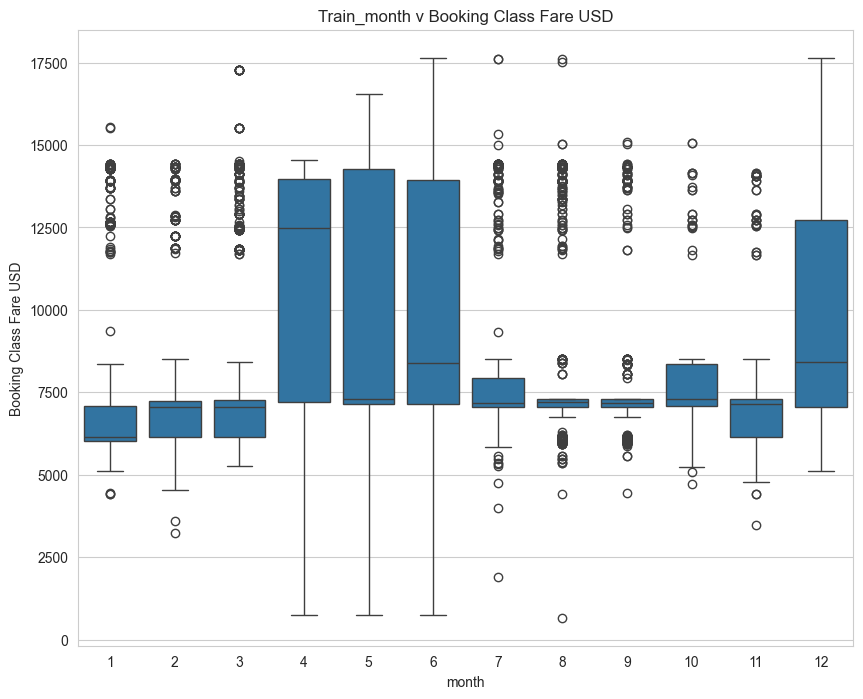

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = pd.concat([new_df, month], axis=1)

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=plot_df, x='month', y='Booking Class Fare USD')
ax.set_title('Train_month v Booking Class Fare USD')
plt.show()

In [174]:
# new_df

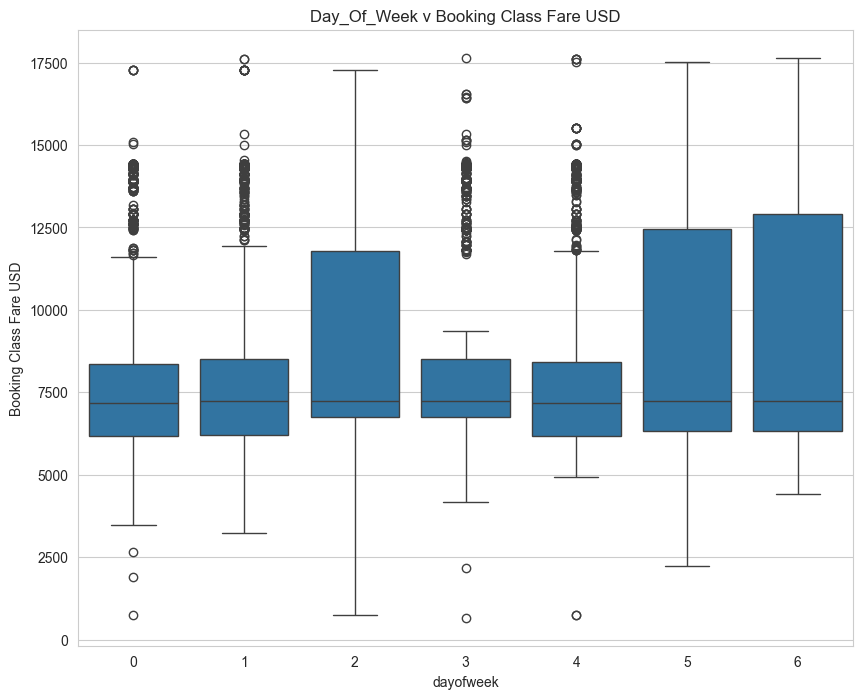

In [175]:
fig, ax = plt.subplots(figsize=(10, 8))

plot_df = pd.concat([new_df, week_day], axis=1)

sns.boxplot(data=plot_df, x='dayofweek', y='Booking Class Fare USD')
ax.set_title('Day_Of_Week v Booking Class Fare USD')
plt.show()

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
# df_long_encoded.drop(['Unnamed: 0'], axis=1, inplace=True)

# Separate features and target variable
X = new_df.drop('Booking Class Fare USD', axis=1)
y = new_df['Booking Class Fare USD']

X_cols = X.columns.tolist()
print(X_cols)

['B: 0', 'B: 1', 'B: 2', 'B: 3', 'B: 4', 'B: 5', 'B: 6', 'B: 7', 'B: 8', 'B: 9', 'B: 10', 'B: 11', 'B: 12', 'B: 13', 'B: 14', 'B: 15', 'B: 16', 'B: 17', 'B: 18', 'B: 19', 'B: 20', 'B: 21', 'B: 22', 'B: 23', 'B: 24', 'B: 25', 'B: 26', 'B: 27', 'B: 28', 'B: 29', 'B: 30', 'B: 31', 'B: 32', 'B: 33', 'B: 34', 'B: 35', 'B: 36', 'B: 37', 'B: 38', 'B: 39', 'B: 40', 'B: 41', 'B: 42', 'B: 43', 'B: 44', 'B: 45', 'B: 46', 'B: 47', 'B: 48', 'B: 49', 'B: 50', 'B: 51', 'B: 52', 'B: 53', 'B: 54', 'B: 55', 'B: 56', 'B: 57', 'B: 58', 'B: 59', 'B: 60', 'B: 61', 'B: 62', 'B: 63', 'B: 64', 'B: 65', 'B: 66', 'B: 67', 'B: 68', 'B: 69', 'B: 70', 'B: 71', 'B: 72', 'B: 73', 'B: 74', 'B: 75', 'B: 76', 'B: 77', 'B: 78', 'B: 79', 'B: 80', 'B: 81', 'B: 82', 'B: 83', 'B: 84', 'B: 85', 'B: 86', 'B: 87', 'B: 88', 'B: 89', 'B: 90', 'B: 91', 'B: 92', 'B: 93', 'B: 94', 'B: 95', 'B: 96', 'B: 97', 'B: 98', 'B: 99', 'B: 100', 'B: 101', 'B: 102', 'B: 103', 'B: 104', 'B: 105', 'B: 106', 'B: 107', 'B: 108', 'B: 109', 'B: 110',

In [183]:
# Since the dataset is divided based on 'Unique_Flight_ID', let's use that for splitting
l =[]
for i in X.index:
    l.append(i)
    
arr = pd.DataFrame(data=l)

# arr[0]
unique_flight_ids = arr[0].unique()
print(unique_flight_ids)

[   0    1    2 ... 9632 9633 9634]


In [184]:

# Split the unique flight IDs into training and testing sets
train_ids, test_ids = train_test_split(unique_flight_ids, test_size=0.2, random_state=42)
print("TRAIN IDS:")
print(train_ids)
print(len(train_ids))
print("\n\n\n")
print("Test IDS:")
print(test_ids)
print(len(test_ids))
print("\n\n\n")

TRAIN IDS:
[ 455 8497 1197 ... 5390  860 7270]
7708




Test IDS:
[8209 7480 3749 ... 5605 8665 5851]
1927



In [185]:

# Create training and testing datasets based on these IDs
X_train = X[X.index.isin(train_ids)]
y_train = y[X.index.isin(train_ids)]
X_test = X[X.index.isin(test_ids)]
y_test = y[X.index.isin(test_ids)]


print("X_train len: ", X_train.shape)
print("y_train len: ", y_train.shape)

print("X_test len: ", X_test.shape)
print("y_test len: ", y_test.shape)
# Drop the 'Unique_Flight_ID' as it's not needed for training
# X_train_Uniq = X_train.copy()
# X_test_Uniq = X_test.copy()

# X_train = X_train.drop(['Unique_Flight_ID'], axis=1)
# X_test = X_test.drop(['Unique_Flight_ID'], axis=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


X_train len:  (7708, 404)
y_train len:  (7708,)
X_test len:  (1927, 404)
y_test len:  (1927,)


((7708, 404), (1927, 404), (7708,), (1927,))

In [186]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Initialize XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


from tensorflow import keras
from tensorflow.keras import layers
# 
# # Define the Neural Network architecture
# model = keras.Sequential([
#     layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(4, activation='relu'),
#     layers.Dense(1, activation='linear')  # Linear activation for regression
# ])
# 
# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


# # Build a more robust Neural Network
# model = keras.Sequential([
#     layers.Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     # layers.Dropout(0.3),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.1),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(128, activation="relu"),
#     layers.Dropout(0.1),
#     layers.Dense(64, activation="relu"),
#     layers.Dropout(0.2),
#     layers.Dense(32, activation="relu"),
#     layers.Dropout(0.2),
#     layers.Dense(1, activation='linear')
# ])
# 
# # Compile the model with a different optimizer and learning rate
# optimizer = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
# 
# # Apply early stopping
# early_stopping = keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=150, restore_best_weights=True
# )
# 
# # Train the model with validation and early stopping
# history = model.fit(
#     X_train_scaled, y_train, epochs=300, batch_size=256,
#     validation_split=0.2, callbacks=[early_stopping]
# )

# # Evaluate and plot as before
# # ...

Mean Squared Error: 388005.6540929691


In [187]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import numpy as np

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}")

# R-Squared
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

# Explained Variance Score
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")

# Median Absolute Error
medae = np.median(np.abs(y_test - y_pred))
print(f"Median Absolute Error: {medae}")

Mean Squared Error: 388005.6540929691
Mean Absolute Percentage Error: 3.884292215262823
R-Squared: 0.9569696637775204
Explained Variance Score: 0.956971494302772
Median Absolute Error: 106.90052734374967


In [130]:
# import matplotlib.pyplot as plt
# 
# # Assuming you have this line of code for training
# # history = model.fit(X_train_scaled, y_train, epochs=300, batch_size=256, validation_split=0.2, callbacks=[early_stopping])
# 
# # Plotting the loss
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Training and Validation Loss Over Epochs')
# plt.legend()
# plt.show()

In [188]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(len(y_pred))
print(len(y_test))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

mae, rmse





1927
1927


(251.8896099400582, 622.9009986289708)

In [54]:
# model.save("model_rev.h5")

/Users/aniruddhamukherjee/miniconda3/envs/finalytics/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [189]:
import pandas as pd


df_metrics = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

# Calculate the actual vs predicted difference
df_metrics['actual_vs_prd'] = df_metrics['y_test'] - df_metrics['y_pred']

# Print the DataFrame
df_metrics

,y_test,y_pred,actual_vs_prd
0,8358.56,8231.967773,126.592227
3,8355.57,7388.380859,967.189141
8,8355.57,8359.280273,-3.710273
10,8355.57,8332.288086,23.281914
12,8355.57,8344.034180,11.535820
...,...,...,...
9620,14422.16,14111.036133,311.123867
9624,14422.16,14312.816406,109.343594
9625,14427.86,14226.279297,201.580703
9628,14422.16,14165.744141,256.415859


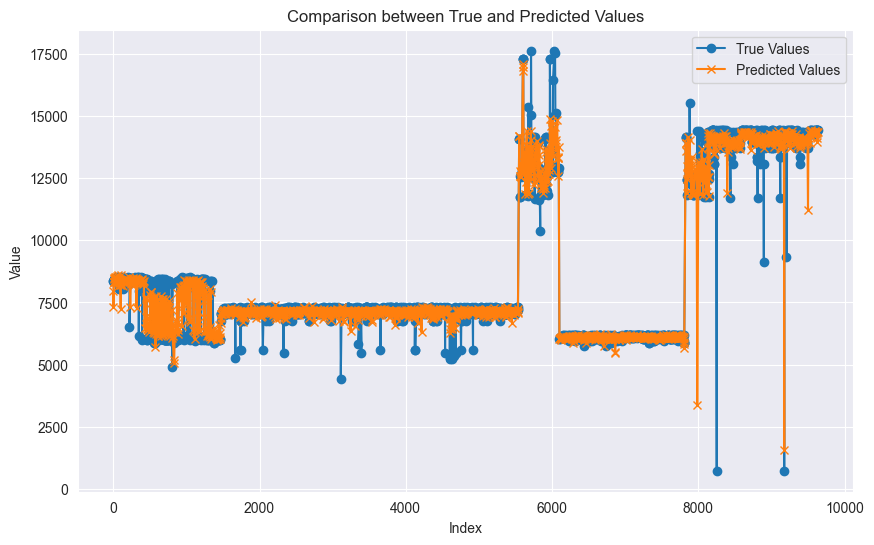

In [133]:
# y_pred = model.predict(X_test_scaled)
# print(len(y_pred))

plt.figure(figsize=(10, 6))

# print(y_test.shape)
# Plot y_test
plt.plot(df_metrics['y_test'], label='True Values', marker='o')

# Plot y_pred
plt.plot(df_metrics['y_pred'], label='Predicted Values', marker='x')

# Add title and labels
plt.title('Comparison between True and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show the plot
plt.show()
# This will produce a line plot where the true (y_test) and predicted (y_pred) values are plotted against the index of the test set. The true values are represented with circles ('o') and the predicted values with crosses ('x').
# 
# You can adjust the graph's details according to your needs. Would you like to know more about customising the graph?


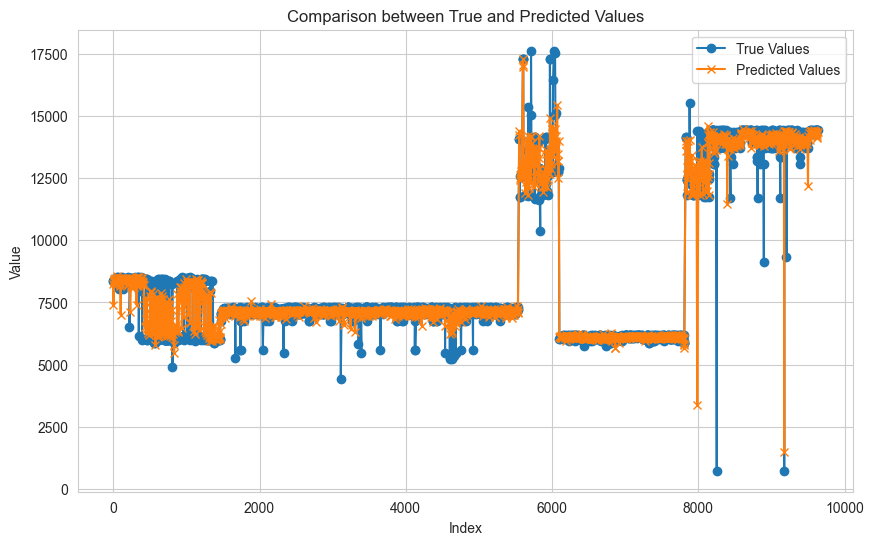

In [190]:
# y_pred = model.predict(X_test_scaled)
# print(len(y_pred))

plt.figure(figsize=(10, 6))

# print(y_test.shape)
# Plot y_test
plt.plot(df_metrics['y_test'], label='True Values', marker='o')

# Plot y_pred
plt.plot(df_metrics['y_pred'], label='Predicted Values', marker='x')

# Add title and labels
plt.title('Comparison between True and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show the plot
plt.show()
# This will produce a line plot where the true (y_test) and predicted (y_pred) values are plotted against the index of the test set. The true values are represented with circles ('o') and the predicted values with crosses ('x').
# 
# You can adjust the graph's details according to your needs. Would you like to know more about customising the graph?


In [51]:
# new_rows = []
# 
# # Loop through each row in original DataFrame
# for index, row in df.iterrows():
#     print(f'at index: {index}')
#     # Create new rows based on 'B: n' columns
#     for days_before, num_bookings in enumerate(row[B_rows_list]):
#         new_row = row.copy()
#         new_row['Number of Bookings'] = num_bookings
#         new_row['Number of days Before Departure'] = days_before
#         new_row['Unique_Flight_ID'] = flight_id
#         # Calculate new 'Departure Date' if needed (omitted in this example)
#         # Append to result DataFrame
#          # Calculate new 'Departure Date'
#         new_row['Dep_Date'] = new_row['Dep_Date'] - pd.DateOffset(days=days_before)
#         
#         
#         new_rows.append(new_row)
#         
#     # Increment Unique Flight ID counter
#     flight_id += 1

at index: 0
at index: 1
at index: 2
at index: 3
at index: 4
at index: 5
at index: 6
at index: 7
at index: 8
at index: 9
at index: 10
at index: 11
at index: 12
at index: 13
at index: 14
at index: 15
at index: 16
at index: 17
at index: 18
at index: 19
at index: 20
at index: 21
at index: 22
at index: 23
at index: 24
at index: 25
at index: 26
at index: 27
at index: 28
at index: 29
at index: 30
at index: 31
at index: 32
at index: 33
at index: 34
at index: 35
at index: 36
at index: 37
at index: 38
at index: 39
at index: 40
at index: 41
at index: 42
at index: 43
at index: 44
at index: 45
at index: 46
at index: 47
at index: 48
at index: 49
at index: 50
at index: 51
at index: 52
at index: 53
at index: 54
at index: 55
at index: 56
at index: 57
at index: 58
at index: 59
at index: 60
at index: 61
at index: 62
at index: 63
at index: 64
at index: 65
at index: 66
at index: 67
at index: 68
at index: 69
at index: 70
at index: 71
at index: 72
at index: 73
at index: 74
at index: 75
at index: 76
at index:

KeyboardInterrupt: 